## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [3]:
Crime = pd.read_csv('crime_data.csv')
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Data understanding

In [4]:
Crime.shape

(50, 5)

In [6]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
Crime.describe(include='all')

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Idaho,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [8]:
Crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

## Data preparation

In [5]:
Crime = Crime.drop(['Unnamed: 0'],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [6]:
Crime['Murder'] = Crime.Murder.astype('int')
Crime['Rape']   = Crime.Rape.astype('int')

In [18]:
Crime.dtypes

Murder      int32
Assault     int64
UrbanPop    int64
Rape        int32
dtype: object

In [7]:
# Normalize heterogenous numerical data by using Standard Scaler

scaler = StandardScaler()
Crime_scaler = scaler.fit_transform(Crime)

In [30]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 

In [56]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,5):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(Crime)
    wcss.append(kmeans.inertia_)

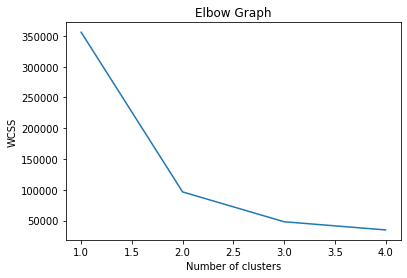

In [57]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)

plt.plot(range(1,5),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Build Cluster algorithm using K=2


In [43]:
# Cluster algorithm using K=2

clusters_4=KMeans(2,random_state=30).fit(Crime_scaler)
clusters_4

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [44]:
clusters_4.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [45]:
# Assign clusters to the data set  

Crime=Crime.copy()
Crime['clusters_4_id']=clusters_4.labels_
Crime

,Murder,Assault,UrbanPop,Rape,cluster,clusters_4_id,clusters_5_id
0,13,236,58,21,2,0,1
1,10,263,48,44,0,0,3
2,8,294,80,31,0,0,3
3,8,190,50,19,3,1,4
4,9,276,91,40,0,0,3
5,7,204,78,38,0,0,3
6,3,110,77,11,4,1,0
7,5,238,72,15,4,1,0
8,15,335,80,31,0,0,3
9,17,211,60,25,2,0,1


In [46]:
# Compute the centroids for K=4 clusters with 11 variables

clusters_4.cluster_centers_

array([[ 1.0255288 ,  1.02412028,  0.19959126,  0.85817565],
       [-0.68368587, -0.68274685, -0.13306084, -0.5721171 ]])

In [47]:
# Group data by Clusters (K=4)

Crime.groupby('clusters_4_id').agg(['mean']).reset_index()

,clusters_4_id,Murder,Assault,UrbanPop,Rape,cluster,clusters_5_id
,,mean,mean,mean,mean,mean,mean
0,0,11.900000,255.250000,68.400000,28.8,0.7,2.3
1,1,4.433333,114.433333,63.633333,15.5,2.3,2.0


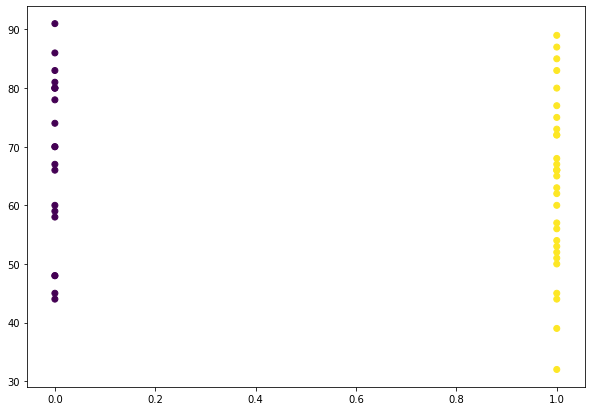

In [48]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(Crime['clusters_4_id'],Crime['UrbanPop'], c=clusters_4.labels_)

## Build cluster algorithm  using K=3

In [49]:
# Cluster algorithm using K=3

clusters_5=KMeans(3,random_state=30).fit(Crime_scaler)
clusters_5

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=30, tol=0.0001, verbose=0)

In [50]:
clusters_5.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [51]:
# Assign clusters to the data set

Crime= Crime.copy()
Crime['clusters_5_id']=clusters_5.labels_
Crime

,Murder,Assault,UrbanPop,Rape,cluster,clusters_4_id,clusters_5_id
0,13,236,58,21,2,0,0
1,10,263,48,44,0,0,0
2,8,294,80,31,0,0,0
3,8,190,50,19,3,1,2
4,9,276,91,40,0,0,0
5,7,204,78,38,0,0,0
6,3,110,77,11,4,1,2
7,5,238,72,15,4,1,2
8,15,335,80,31,0,0,0
9,17,211,60,25,2,0,0


In [52]:
# Compute the centroids for K=5 clusters with 11 variables

clusters_5.cluster_centers_

array([[ 1.0255288 ,  1.02412028,  0.19959126,  0.85817565],
       [-0.99271798, -1.14153431, -0.99725843, -1.0202038 ],
       [-0.47766446, -0.37688855,  0.44307089, -0.27339263]])

In [53]:
# Group data by Clusters (K=5)

Crime.groupby('clusters_5_id').agg(['mean']).reset_index()

,clusters_5_id,Murder,Assault,UrbanPop,Rape,cluster,clusters_4_id
,,mean,mean,mean,mean,mean,mean
0,0,11.900000,255.250000,68.400000,28.800000,0.700000,0
1,1,3.083333,76.583333,51.250000,11.333333,1.333333,1
2,2,5.333333,139.666667,71.888889,18.277778,2.944444,1


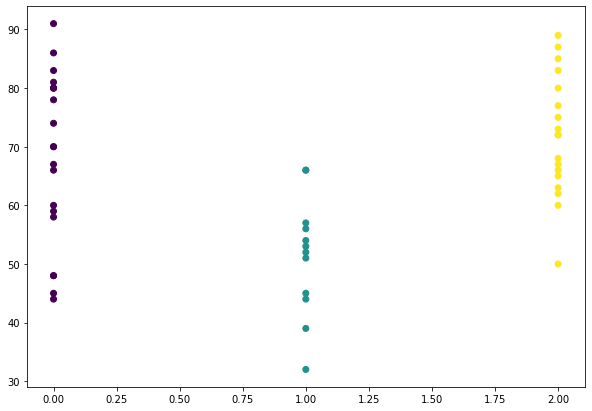

In [54]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(Crime['clusters_5_id'],Crime['UrbanPop'], c=clusters_5.labels_)

## DBSCAN Clustering

In [10]:
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(Crime_scaler)

DBSCAN(algorithm='auto', eps=0.8, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [11]:
#Noisy samples are given the label -1.

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0],
      dtype=int64)

In [12]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [14]:
Crime = pd.concat([Crime,cl],axis=1)
Crime

,Murder,Assault,UrbanPop,Rape,cluster
0,13,236,58,21,-1
1,10,263,48,44,-1
2,8,294,80,31,-1
3,8,190,50,19,-1
4,9,276,91,40,-1
5,7,204,78,38,-1
6,3,110,77,11,-1
7,5,238,72,15,-1
8,15,335,80,31,-1
9,17,211,60,25,-1


In [15]:
# Group data by Clusters 

Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,7.642857,178.904762,65.380952,21.333333
1,0,6.250000,128.000000,66.375000,18.125000


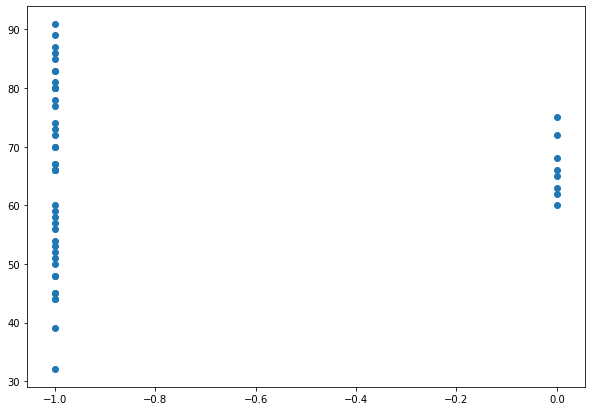

In [16]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(Crime['cluster'],Crime['UrbanPop'])

## Hierarchical Clustering 

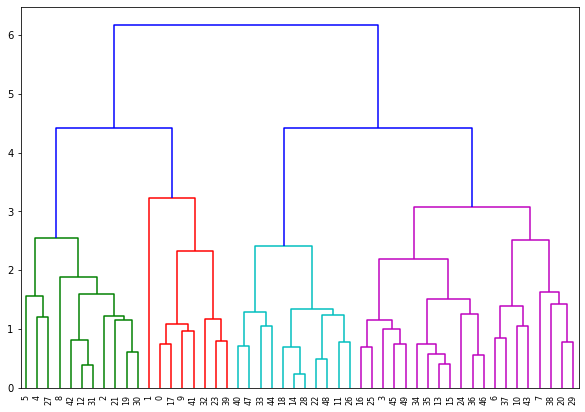

In [17]:
# create dendrogram

plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(Crime_scaler,'complete',))
plt.show()

In [23]:
# Create Clusters (y)

hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [25]:
y=pd.DataFrame(hclusters.fit_predict(Crime_scaler),columns=['cluster'])
y['cluster'].value_counts()

0    15
1    11
3    10
4     7
2     7
Name: cluster, dtype: int64

In [27]:
# Adding clusters to dataset

Crime['cluster']=hclusters.labels_
Crime

,Murder,Assault,UrbanPop,Rape,cluster
0,13,236,58,21,2
1,10,263,48,44,0
2,8,294,80,31,0
3,8,190,50,19,3
4,9,276,91,40,0
5,7,204,78,38,0
6,3,110,77,11,4
7,5,238,72,15,4
8,15,335,80,31,0
9,17,211,60,25,2


In [28]:
Crime.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,9.666667,243.333333,75.200000,32.133333
1,1,2.363636,73.000000,52.000000,10.909091
2,2,14.428571,251.285714,54.285714,21.285714
3,3,6.900000,133.000000,62.400000,18.000000
4,4,4.285714,142.285714,81.857143,15.714286


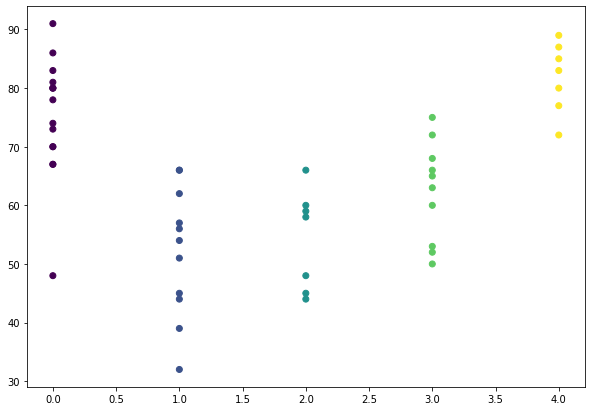

In [55]:
# Plot Clusters

plt.figure(figsize=(10, 7))  
plt.scatter(Crime['cluster'],Crime['UrbanPop'], c=hclusters.labels_)